## Term Deposit Sales Analysis

### Objective of Analysis ..
To build a model that will help the Marketing Team in identifying and predicting if a customer will be more likely to subscribe (Yes/No) to a term deposit, and hence increase their hit ratio.

#### Resources ..
Using historical data collected from existing customers for this Project and is available in the attached file

#### Initial libraries and datasets
Importing the initial libraries and datasets

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

# Importing initial libraries
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

# plotting libraries
import matplotlib.pyplot as plt
# to enable plotting graphs
%matplotlib inline
# imorting Seaborn for statistical plots
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC


In [2]:
# Importing dataset
df = pd.read_csv('bank-full.csv')

### Deliverable 01 .. Exploratory Data Analysis (EDA)
- Read the dataset and prepare it for further analysis
- Univariate analysis
- Multi-variate analysis

Reading the dataset and the information related to its various contents and data types.

In [3]:
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [7]:
# check for duplicates
df = df.drop_duplicates(keep = 'first')
df.shape

(45211, 17)

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']}

General observations on the dataset includes the folowing ..
- No missing or null values
- No duplicated variables
- Dataset has numeric and non-numeric data types
- Numeric data is in 7 columns: 'age', 'balance', 'day', 'duration', 'campaign', 'pdays' and 'previous'
- There is a possibility for an outlier in the dataset 'balance' and heavy skewness as will be illustrated and detailed
- Target or dependant variable (Subscriptions) is 'Target'

Further exploration is required for the following ..
- Explore content of dataset
- To verify irrelevant data and drop it
- Deal with outliers
- Prepare the dataset for further analysis 

<AxesSubplot:>

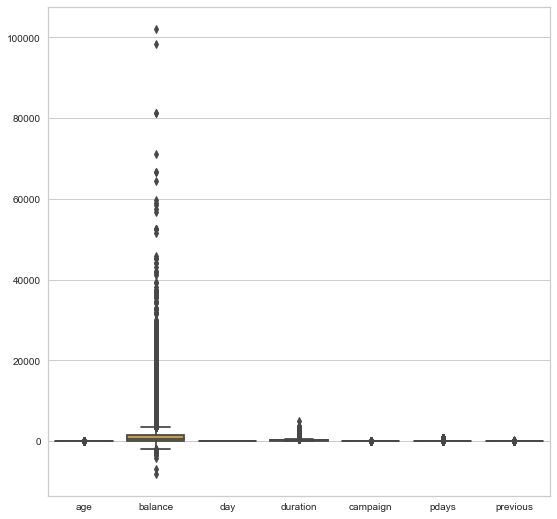

In [9]:
plt.figure(figsize=(9,9))
sns.boxplot(data=df)
# comparison of the 7 numerical variable.
# 'balance' and duration' are showing the presence of outliers.
# 'duration' is not relevant to this analysis and could be dropped.

<AxesSubplot:xlabel='balance'>

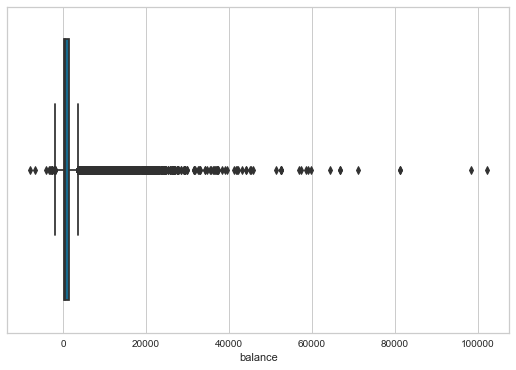

In [10]:
plt.figure(figsize=(9,6))
sns.boxplot(df['balance'])
#   Outliers will be preprocessed using the IQR

In [11]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


1356.0


In [12]:
df_out = df['balance'][~((df['balance'] < (Q1 - 1.5 * IQR)) | (df['balance'] > (Q3 + 1.5 * IQR)))]
df_out.shape

(40482,)

<AxesSubplot:xlabel='balance'>

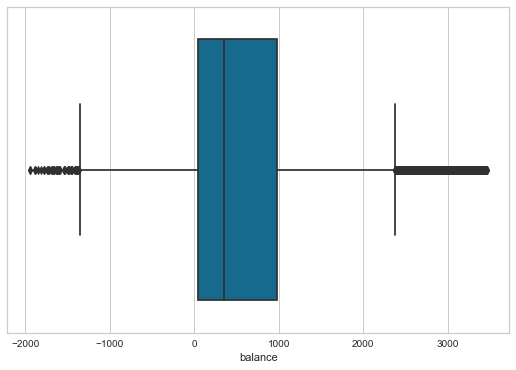

In [13]:
plt.figure(figsize=(9,6))
sns.boxplot(df_out)

Tried replacing column 'df_out' with 'balance' but it didn't work and as a result I am proceeding with 'balance' due to the limited available time

#### Attribute: Age

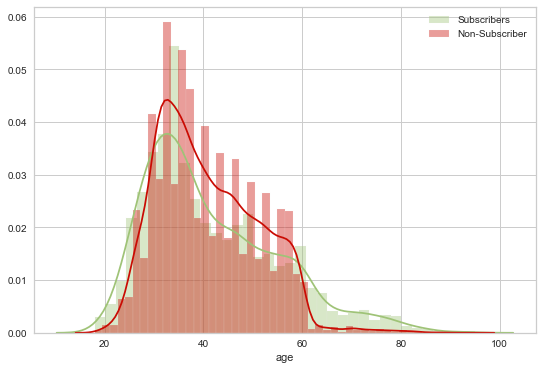

In [14]:
plt.figure(figsize=(9,6))
sns.distplot(df[df['Target']=='yes']['age'],color='g',label='Subscribers')
sns.distplot(df[df['Target']=='no']['age'],color='r',label='Non-Subscriber')
plt.legend()
plt.show()

#### Attributre: Balance

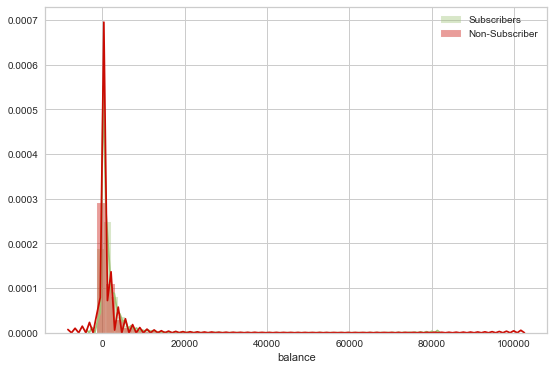

In [15]:
plt.figure(figsize=(9,6))
sns.distplot(df[df['Target']=='yes']['balance'],color='g',label='Subscribers')
sns.distplot(df[df['Target']=='no']['balance'],color='r',label='Non-Subscriber')
plt.legend()
plt.show()
# This result is prior to dropping the outliers in 'balance'

#### Desired Attribute: Target (Subscribers - Yes/No)

In [16]:
print(df['Target'].value_counts())
# Target or Desired Attribute
print()
print("Number of Non-Subscribed Customers is {:} and Sunscribed is: {:}".format(
    df[df['Target'] == 'no'].shape[0], 
    df[df['Target'] == 'yes'].shape[0]))

no     39922
yes     5289
Name: Target, dtype: int64

Number of Non-Subscribed Customers is 39922 and Sunscribed is: 5289


no    0.88
yes   0.12
Name: Target, dtype: float64


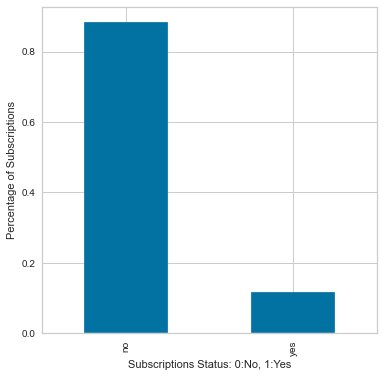

In [17]:
plt.figure(figsize=(6,6))
df['Target'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Subscriptions Status: 0:No, 1:Yes")
plt.ylabel("Percentage of Subscriptions")
print(df['Target'].value_counts(normalize=True))
plt.show()

#### Attribute: Job

In [19]:
pd.crosstab(df['Target'], df['job'])
# Total number of Subscribers 'Yes' in relation to 'job' attribute

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Target,,,,,,,,,,,,
no,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
yes,631,708,123,109,1301,516,187,369,269,840,202,34


<AxesSubplot:xlabel='count', ylabel='job'>

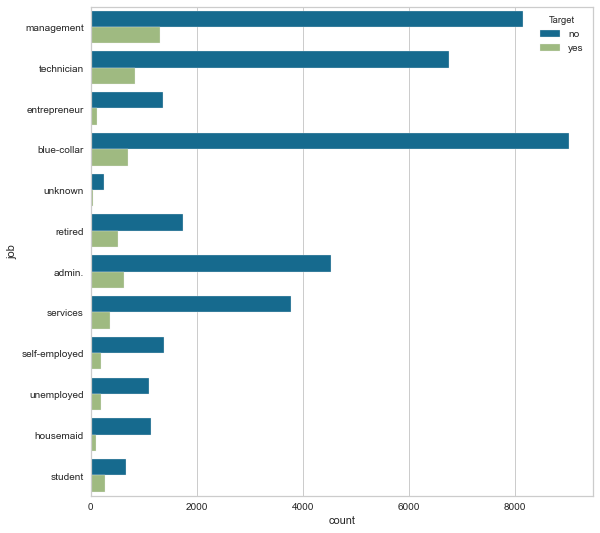

In [20]:
plt.figure(figsize=(9,9))
sns.countplot(y=df['job'], hue=df['Target'])

#### Attribute: Marital

In [21]:
pd.crosstab(df['Target'], df['marital'])
# Total number of Subscribers 'Yes' in relation to 'marital' attribute

marital,divorced,married,single
Target,,,
no,4585,24459,10878
yes,622,2755,1912


<AxesSubplot:xlabel='marital', ylabel='count'>

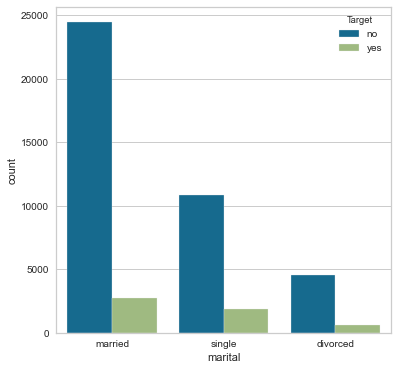

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['marital'], hue=df['Target'])

#### Attribute: Education

In [22]:
pd.crosstab(df['Target'], df['education'])
# Total number of Subscribers 'Yes' in relation to 'education' attribute

education,primary,secondary,tertiary,unknown
Target,,,,
no,6260,20752,11305,1605
yes,591,2450,1996,252


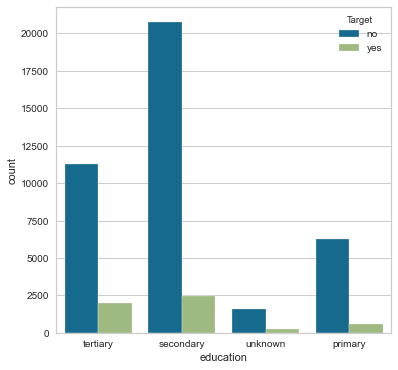

In [23]:
plt.figure(figsize=(6,6))
Education_Subscribers = sns.countplot(x="education", hue="Target", data=df)

#### Attriburte: Default

In [26]:
pd.crosstab(df['Target'], df['default'])
# Total number of Subscribers 'Yes' in relation to 'default' attribute

default,no,yes
Target,,
no,39159,763
yes,5237,52


<AxesSubplot:xlabel='default', ylabel='count'>

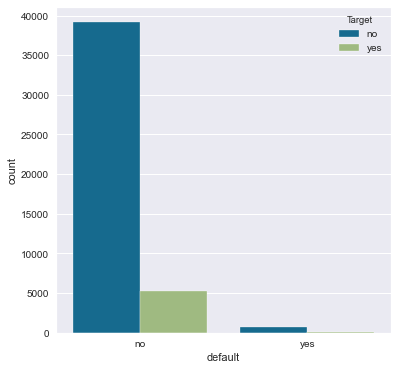

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['default'], hue=df['Target'])

#### Attribute: Housing

In [29]:
pd.crosstab(df['Target'], df['housing'])
# Total number of Subscribers 'Yes' in relation to 'housing' attribute

housing,no,yes
Target,,
no,16727,23195
yes,3354,1935


<AxesSubplot:xlabel='housing', ylabel='count'>

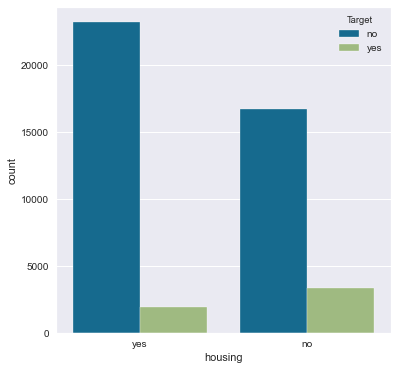

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['housing'], hue=df['Target'])

#### Attribute: Loan

In [31]:
pd.crosstab(df['Target'], df['loan'])
# Total number of Subscribers 'Yes' in relation to 'loan' attribute

loan,no,yes
Target,,
no,33162,6760
yes,4805,484


<AxesSubplot:xlabel='loan', ylabel='count'>

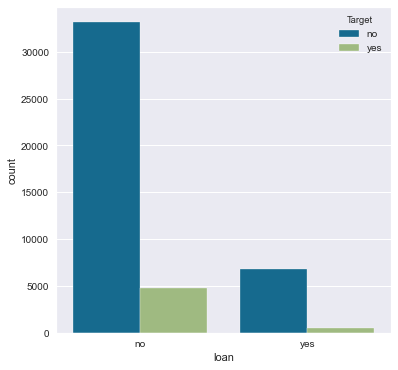

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['loan'], hue=df['Target'])

#### Attribute: Contact

<AxesSubplot:xlabel='count', ylabel='contact'>

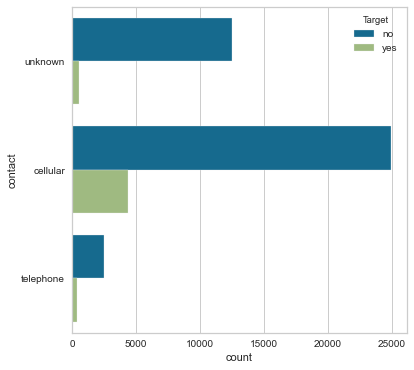

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(y=df['contact'], hue=df['Target'])
# to be dropped - irrelvant and too mnay unknowns

#### Attribute: Month

In [34]:
pd.crosstab(df['Target'], df['month'])
# Total number of Subscribers 'Yes' in relation to 'month' attribute

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
Target,,,,,,,,,,,,
no,2355,5559,114,2208,1261,6268,4795,229,12841,3567,415,310
yes,577,688,100,441,142,627,546,248,925,403,323,269


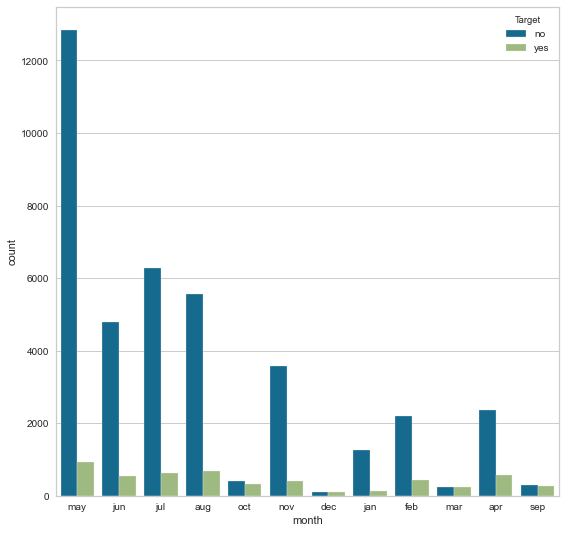

In [25]:
plt.figure(figsize=(9,9))
Month_Subscribers = sns.countplot(x="month", hue="Target", data=df)

#### Attribute: Day

In [26]:
pd.crosstab(df['Target'], df['day'])
# Total number of Subscribers 'Yes' in relation to 'day' of the month attribute
# To be dropped - irrelvant

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Target,,,,,,,,,,,,,,,,,,,,,
no,232,1111,901,1215,1695,1751,1660,1641,1382,403,...,751,813,385,707,919,971,1687,1616,1295,597
yes,90,182,178,230,215,181,157,201,179,121,...,154,126,62,133,116,150,143,129,271,46


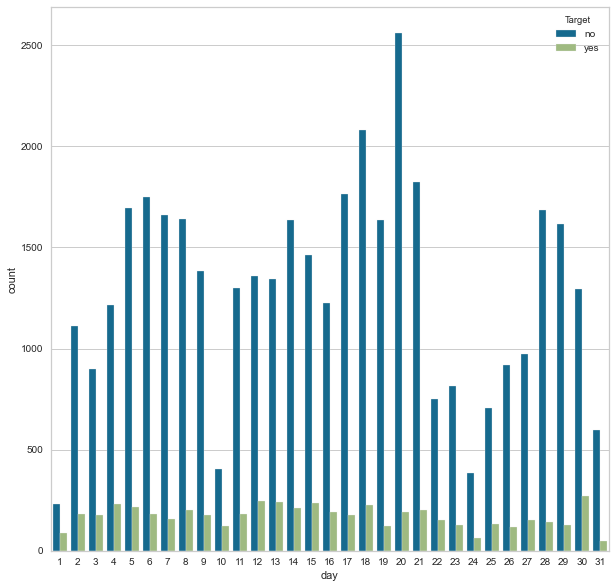

In [27]:
plt.figure(figsize=(10,10))
Day_Subscribers = sns.countplot(x="day", hue="Target", data=df)

#### Attribute: Duration

In [40]:
pd.crosstab(df['Target'], df['duration'])
# Total number of Subscribers 'Yes' in relation to 'duration' attribute
# # to be dropped - irrelvant

duration,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1017,1018,1019,1020,1021,1022,1023

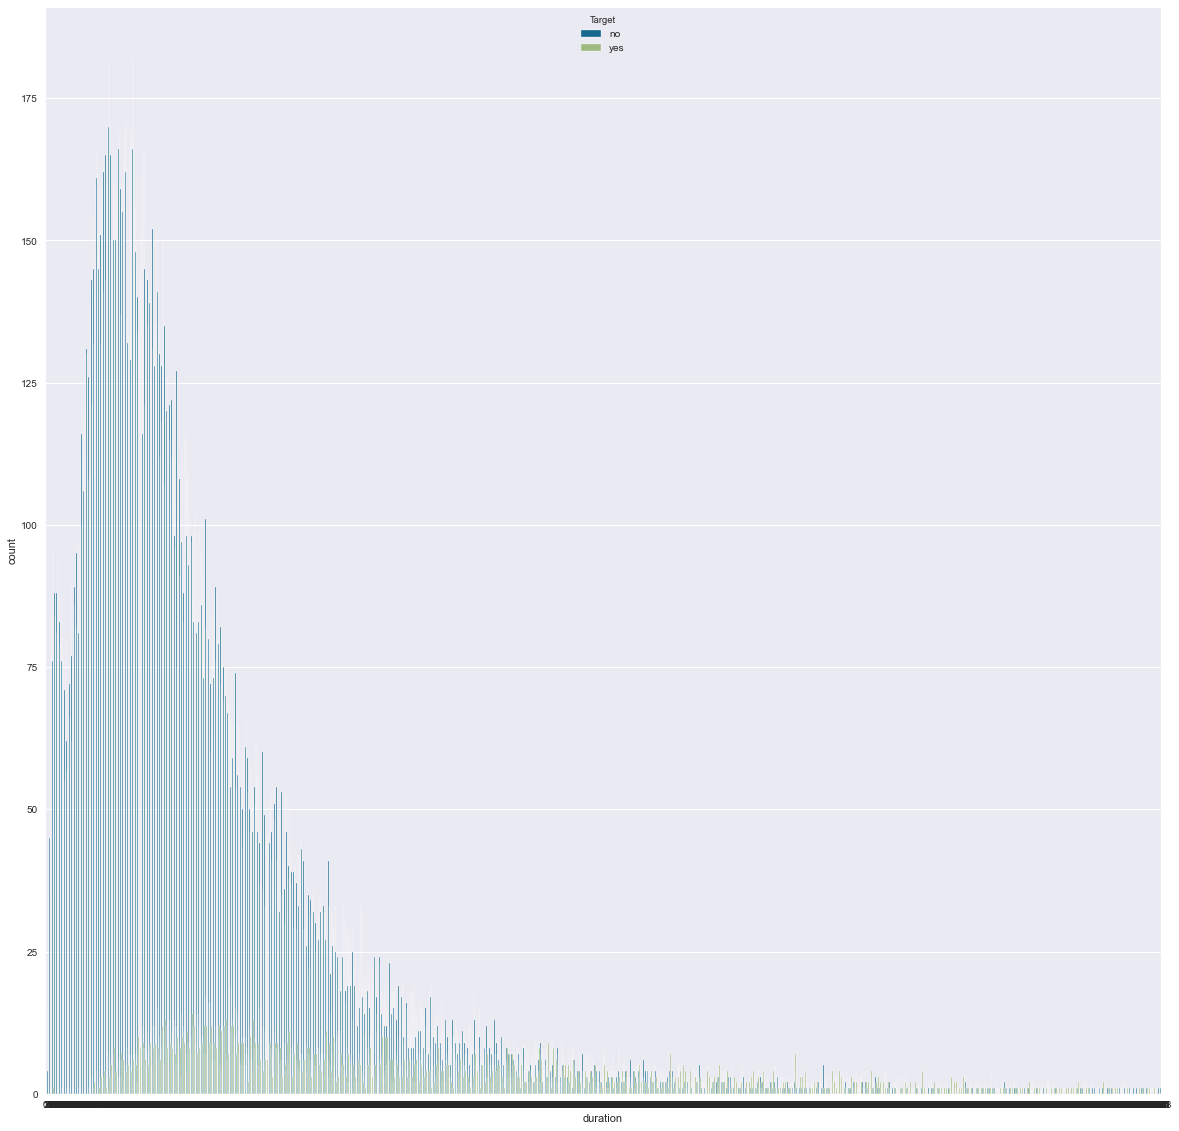

In [41]:
plt.figure(figsize=(20,20))
Duration_Subscribers = sns.countplot(x="duration", hue="Target", data=df)

#### Attribute: Campaign

In [42]:
pd.crosstab(df['Target'], df['campaign'])
# Total number of Subscribers 'Yes' in relation to 'campaign' attribute

campaign,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,43,44,46,50,51,55,58,63
Target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,14983,11104,4903,3205,1625,1199,688,508,306,252,185,151,127,89,80,77,63,51,44,42,34,23,22,19,22,13,10,16,15,8,12,8,6,5,4,4,2,3,1,2,3,1,1,2,1,1,1,1
yes,2561,1401,618,317,139,92,47,32,21,14,16,4,6,4,4,2,6,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


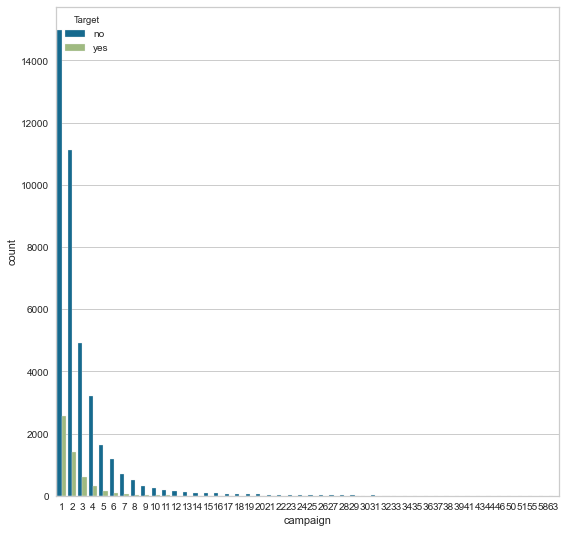

In [28]:
plt.figure(figsize=(9,9))
Campaign_Subscribers = sns.countplot(x="campaign", hue="Target", data=df)

#### Attribute: Pdays

In [29]:
pd.crosstab(df['Target'], df['pdays'])
# Total number of Subscribers 'Yes' in relation to 'pdays' attribute

pdays,-1,1,2,3,4,5,6,7,8,9,...,805,808,826,828,831,838,842,850,854,871
Target,,,,,,,,,,,,,,,,,,,,,
no,33570,9,35,1,1,11,9,7,25,9,...,0,1,1,0,1,1,0,1,0,1
yes,3384,6,2,0,1,0,1,0,0,3,...,1,0,0,1,0,0,1,0,1,0


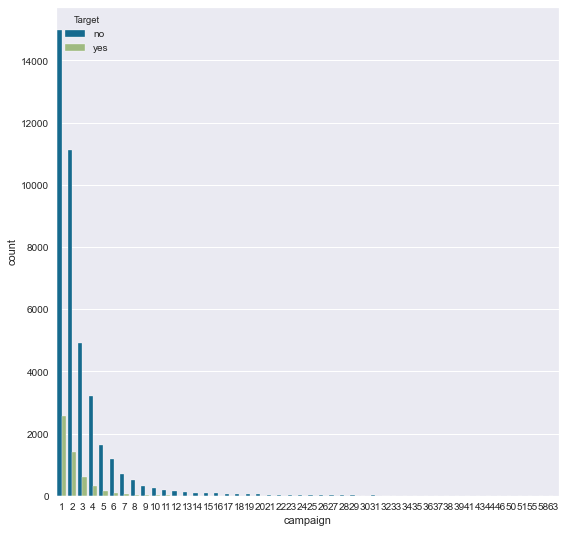

In [48]:
plt.figure(figsize=(9,9))
Campaign_Subscribers = sns.countplot(x="campaign", hue="Target", data=df)

#### Attribute: Previous

In [46]:
pd.crosstab(df['Target'], df['previous'])
# Total number of Subscribers 'Yes' in relation to 'previous' attribute
# To be dropped for this analysis - irrelevant in its input, imbalanced and heavily skewed to 'No'

previous,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,35,37,38,40,41,51,55,58,275
Target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,33570,2189,1650,848,543,338,194,151,90,68,41,50,34,29,14,19,13,12,6,9,7,3,5,7,5,4,1,5,2,3,2,1,1,2,2,1,1,1,0,0,1
yes,3384,583,456,294,171,121,83,54,39,24,26,15,10,9,5,1,0,3,0,2,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0


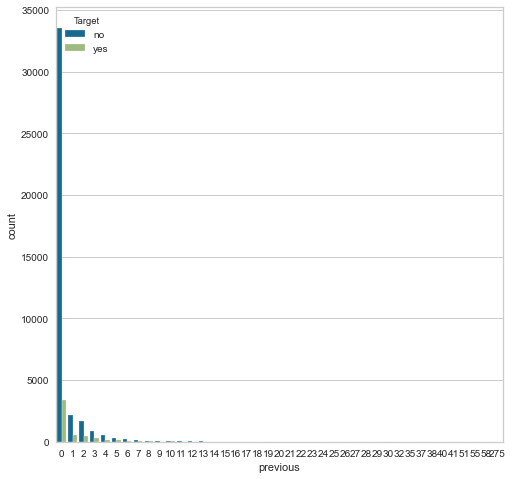

In [30]:
plt.figure(figsize=(8,8))
Previous_Subscribers = sns.countplot(x="previous", hue="Target", data=df)

#### Attribute:  Poutcome

In [31]:
pd.crosstab(df['Target'], df['poutcome'])
# Total number of Subscribers 'Yes' in relation to 'poutcome' attribute
# To be dropped - too many unknowns and others which are undefined

poutcome,failure,other,success,unknown
Target,,,,
no,4283,1533,533,33573
yes,618,307,978,3386


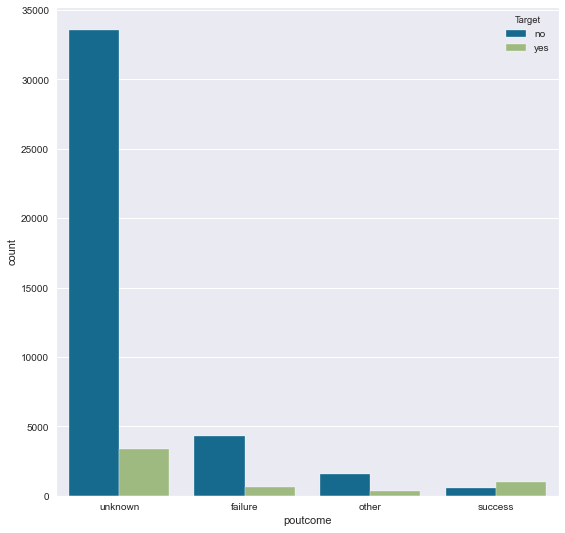

In [51]:
plt.figure(figsize=(9,9))
Poutcome_Subscribers = sns.countplot(x="poutcome", hue="Target", data=df)

#### Distribution of continuous variables

In [140]:
categorical_vars = df.describe(include=["object"]).columns
continuous_vars = df.describe().columns

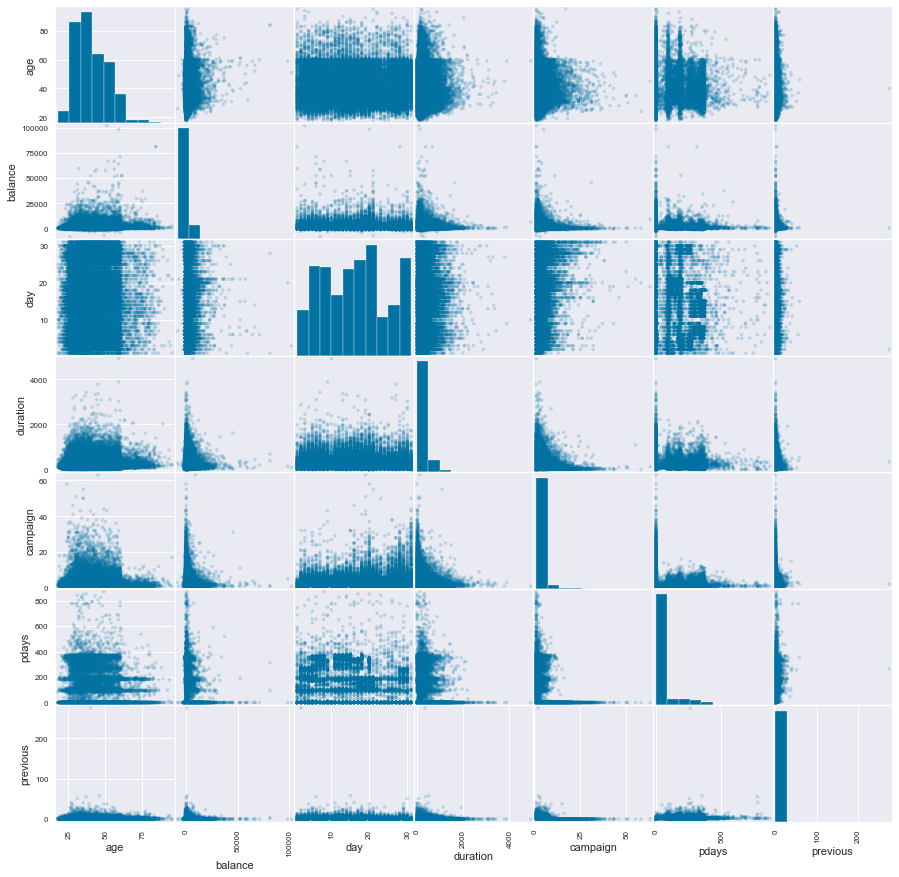

In [51]:
pd.plotting.scatter_matrix(df[continuous_vars], alpha=.2, figsize=(15, 15));

#### Correlation

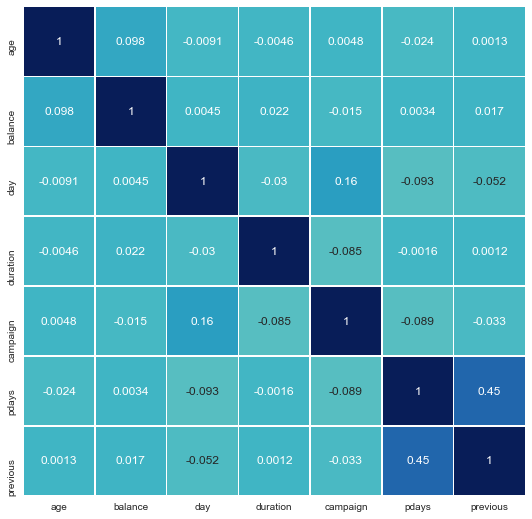

In [52]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),
            
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

### Deliverable 02 .. Preparing the data for analytics
- Ensure attributes are correct
- Get data model ready
- Transfrom data
- Create the training set and test set in ration of 70:30


In [53]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


In [33]:
df.shape

(45211, 17)

In [147]:
df01 = df.drop(['duration', 'contact', 'day', 'default','campaign', 'poutcome'], axis=1, inplace=False)
df01.shape

(45211, 11)

In [148]:
df01.head()

,age,job,marital,education,balance,housing,loan,month,pdays,previous,Target
0,58,management,married,tertiary,2143,yes,no,may,-1,0,no
1,44,technician,single,secondary,29,yes,no,may,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,may,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,may,-1,0,no
4,33,unknown,single,unknown,1,no,no,may,-1,0,no


In [134]:
df01['Target'].nunique

<bound method IndexOpsMixin.nunique of 0                                                        no
1                                                        no
2                                                        no
3                                                        no
4                                                        no
                                ...                        
45207                                                   yes
45208                                                   yes
45209                                                    no
45210                                                    no
Target    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: Target, Length: 45212, dtype: object>

In [158]:
df01.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [159]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   month      45211 non-null  object
 8   pdays      45211 non-null  int64 
 9   previous   45211 non-null  int64 
 10  Target     45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.4+ MB


In [155]:
df02 = pd.Series(np.where(df01.Target.values == 'yes', 1, 0), df01.index)

In [157]:
df02.shape

(45211,)

In [48]:
# Binning 'age'
bins = [1000, 3000, 5000, 7000, 9000, 11000]
balance_range = ['Very_Low', 'Low', 'Medium', 'High', 'Highest']
df01['balance'] = pd.cut(df01['balance'], bins, labels = balance_range)

In [114]:
df01

,age,job,marital,education,balance,housing,loan,month,pdays,previous,Target
0,58,management,married,tertiary,2143,yes,no,may,-1,0,no
1,44,technician,single,secondary,29,yes,no,may,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,may,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,may,-1,0,no
4,33,unknown,single,unknown,1,no,no,may,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,nov,-1,0,yes
45207,71,retired,divorced,primary,1729,no,no,nov,-1,0,yes
45208,72,retired,married,secondary,5715,no,no,nov,184,3,yes
45209,57,blue-collar,married,secondary,668,no,no,nov,-1,0,no


In [64]:
df01.dropna()

,age,job,marital,education,balance,housing,loan,month,pdays,previous,Target
0,58,management,married,tertiary,2143,yes,no,may,-1,0,no
1,44,technician,single,secondary,29,yes,no,may,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,may,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,may,-1,0,no
4,33,unknown,single,unknown,1,no,no,may,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,nov,-1,0,yes
45207,71,retired,divorced,primary,1729,no,no,nov,-1,0,yes
45208,72,retired,married,secondary,5715,no,no,nov,184,3,yes
45209,57,blue-collar,married,secondary,668,no,no,nov,-1,0,no


In [54]:
df01

,age,job,marital,education,balance,housing,loan,month,pdays,previous
0,Old,management,married,tertiary,Very_Low,yes,no,may,-1,0
1,Young,technician,single,secondary,NaN,yes,no,may,-1,0
2,Young,entrepreneur,married,secondary,NaN,yes,yes,may,-1,0
3,Young,blue-collar,married,unknown,Very_Low,yes,no,may,-1,0
4,Young,unknown,single,unknown,NaN,no,no,may,-1,0
...,...,...,...,...,...,...,...,...,...,...
45206,Old,technician,married,tertiary,NaN,no,no,nov,-1,0
45207,Old,retired,divorced,primary,Very_Low,no,no,nov,-1,0
45208,Old,retired,married,secondary,Medium,no,no,nov,184,3
45209,Old,blue-collar,married,secondary,NaN,no,no,nov,-1,0


In [113]:
df01.dropna()

,age,job,marital,education,balance,housing,loan,month,pdays,previous,Target
0,58,management,married,tertiary,2143,yes,no,may,-1,0,no
1,44,technician,single,secondary,29,yes,no,may,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,may,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,may,-1,0,no
4,33,unknown,single,unknown,1,no,no,may,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,nov,-1,0,yes
45207,71,retired,divorced,primary,1729,no,no,nov,-1,0,yes
45208,72,retired,married,secondary,5715,no,no,nov,184,3,yes
45209,57,blue-collar,married,secondary,668,no,no,nov,-1,0,no


In [58]:
df01

,age,job,marital,education,balance,housing,loan,month,pdays,previous
0,Old,management,married,tertiary,Very_Low,yes,no,may,-1,0
1,Young,technician,single,secondary,NaN,yes,no,may,-1,0
2,Young,entrepreneur,married,secondary,NaN,yes,yes,may,-1,0
3,Young,blue-collar,married,unknown,Very_Low,yes,no,may,-1,0
4,Young,unknown,single,unknown,NaN,no,no,may,-1,0
...,...,...,...,...,...,...,...,...,...,...
45206,Old,technician,married,tertiary,NaN,no,no,nov,-1,0
45207,Old,retired,divorced,primary,Very_Low,no,no,nov,-1,0
45208,Old,retired,married,secondary,Medium,no,no,nov,184,3
45209,Old,blue-collar,married,secondary,NaN,no,no,nov,-1,0


In [108]:
df01.dropna()

,age,job,marital,education,balance,housing,loan,month,pdays,previous,Target
0,58,management,married,tertiary,2143,yes,no,may,-1,0,no
1,44,technician,single,secondary,29,yes,no,may,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,may,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,may,-1,0,no
4,33,unknown,single,unknown,1,no,no,may,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,nov,-1,0,yes
45207,71,retired,divorced,primary,1729,no,no,nov,-1,0,yes
45208,72,retired,married,secondary,5715,no,no,nov,184,3,yes
45209,57,blue-collar,married,secondary,668,no,no,nov,-1,0,no


In [160]:
X = df01.drop('Target', axis=1)
y = df01['Target']
X = pd.get_dummies(X, drop_first=True)

In [177]:
# Ratio of split = 70:30 training:test set
test_size = 0.30 
seed = 10 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [178]:
X_train.head()

,age,balance,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
38436,30,95,298,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6566,37,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13366,42,0,-1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1567,32,20,-1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21685,57,-133,-1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X_train.shape, X_test.shape

((31647, 33), (13564, 33))

In [116]:
X_train.columns

Index(['age', 'balance', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'loan_yes', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

### Deliverable 03 .. The ensemble models
- Develop models using Logistic Regression and Decision Tree algorithms
- Build ensemble models (Bagging and Boosting)
- Compare and evaluate models and their matrics


#### Logistic Regression Model

In [180]:
y = pd.Series(np.where(df01.Target.values == 'yes', 1, 0),
          df01.index)

In [195]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(random_state=10)
# training of the model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
# The model is predicting y values based on test dataset given to the model
y_predict = model.predict(X_test)
print()
print("Trainig accuracy",model.score(X_train,y_train))
print()
print("Testing accuracy",model.score(X_test, y_test))


Trainig accuracy 0.8809997788099978

Testing accuracy 0.8845473311707461


- Model is performing slightly better in Testing than in Training
- Importing metrics to evaluate the model

In [183]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

In [184]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [185]:
confusion_matrix(y_test, y_predict)

array([[11976,    30],
       [ 1536,    22]], dtype=int64)

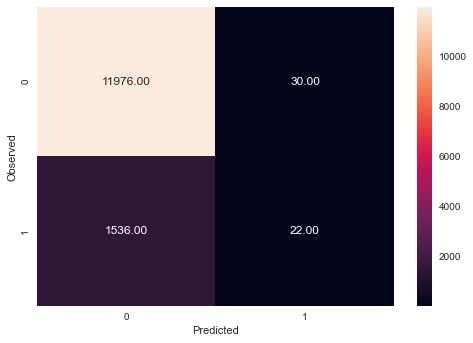

In [186]:
draw_cm(y_test,y_predict)

In [189]:
recall_score(y_test,y_predict)

0.014120667522464698

In [190]:
precision_score(y_test,y_predict)

0.4230769230769231

In [191]:
f1_score(y_test,y_predict)

0.027329192546583846

In [192]:
roc_auc_score(y_test,y_predict)

0.5058109584488886

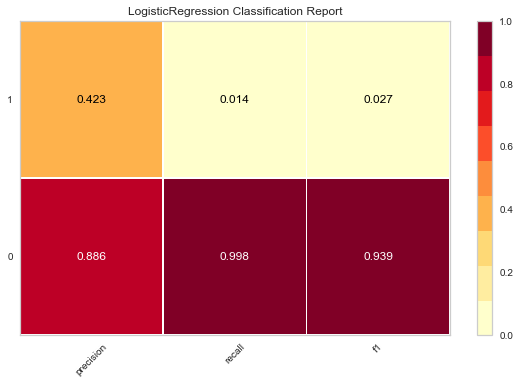

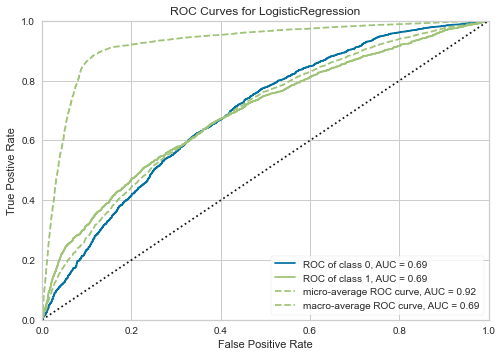

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [193]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

#### Improving the performance of the model
- Imporving the model performance will be through checking the paramaters of the Logistic Regression.
- Performance of model will be checked through different values for 'solvers' and other parameters including penalty, class weight, etc.
- Throgh comparing the resulting corresponding scores for train and test, the final model will be tued and updated.

In [194]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [197]:
# Running a loop to check different values for 'solver'
# Obtaining the resulting scores for comparison

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=10,penalty='l2', solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.881, 0.881, 0.881, 0.882, 0.875]

[0.886, 0.885, 0.886, 0.885, 0.879]


In [198]:
train_score=[]
test_score=[]
solver = ['liblinear','saga'] 
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l1', solver=i)  # changed value of penaly to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.881, 0.875]

[0.886, 0.879]


- Resulting accuracy scores for train and test are not better than the original model
- other parameters 'class weight' will be checked seeking better scores

In [199]:
# Running a loop to check different values for class weight 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=10,penalty='l1',solver='liblinear', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.881, 0.882, 0.881, 0.881, 0.881, 0.881]

[0.885, 0.887, 0.886, 0.886, 0.886, 0.885]


#### Final Model
- According to the above output
- The highest scores of Accuracy for train and test models are obtained using 'solver = liblinear' and 'class weight C = 0.1'

Trainig accuracy 0.8812841659556988

Testing accuracy 0.8854320259510469

Confusion Matrix


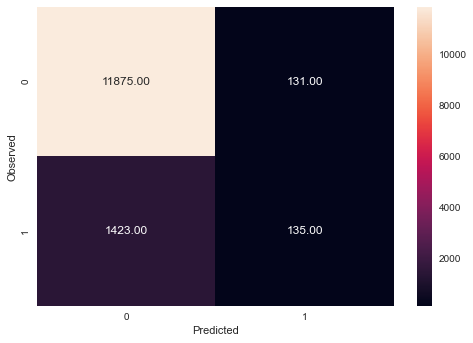

None

Recall: 0.08664955070603338

Precision: 0.5075187969924813

F1 Score: 0.1480263157894737

Roc Auc Score: 0.5378691698224486


ValueError: arrays must all be same length

In [234]:
# final model performance after improvement

model = LogisticRegression(random_state=10,penalty='l1',solver='liblinear') 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))




In [203]:
confusion_matrix(y_test, y_predict)

array([[11875,   131],
       [ 1423,   135]], dtype=int64)

- Confusion Matrix (Final)
- True Positive (TP) (Observed = 1, Prodicted = 1) = 135 (improved, initial model = 22). Prime factor for Subscribers
- False Positive (FP) (Ovserved = 0, Prodicted = 1) = 131 (initial model = 30). Indicates model need more fine tuning
- True Negative (TN) (Observed = 0, Predicted = 0) = 11,875 (Non-Subscribers, initial model 11,976)
- False Negative (FN) (Observed = 1, Predicted = 0) = 1,423 (initial model = 1,536)

#### Decision Tree Model

In [204]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [205]:
y_pred = dt_model.predict(X_test)
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test , y_test))

0.9992100357063861
0.8232822176349159


- dt_model performance is extermely high on the Train set compared to the Test set 
- dt_model is overfit

In [210]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred,average="binary"))

[[10727  1279]
 [ 1118   440]]
0.8232822176349159
0.28241335044929394


- Accuracy is higher than Recall but it is not the best performance metrics for this analysis
- Recall is relatrively low and requires improvement in the dt_model

In [211]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [214]:
## Calculating feature importance

feature_cols = X_train.columns

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)[0:10] #Top 10 features

,0
pdays,0.44
housing_yes,0.37
age,0.17
loan_yes,0.02
job_unknown,0.00
month_jan,0.00
month_aug,0.00
month_dec,0.00
month_feb,0.00
month_jul,0.00


In [215]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [217]:
acc_DT = accuracy_score(y_test, preds_pruned)
recall_DT = recall_score(y_test, preds_pruned)

In [218]:
# Storing accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT, 'recall': recall_DT})
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.89,0.00


- Model overfitting is reduced after pruning
- Recall has drastically reduced

In [220]:
## Applying Random Forest model then print the accuracy of Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [221]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
recall_RF = recall_score(y_test, pred_RF, average="binary")

In [222]:
t_ResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF], 'recall': [recall_RF]})
resultsDf = pd.concat([resultsDf, t_ResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]

resultsDf

,Method,accuracy,recall
0,Decision Tree,0.89,0.00
0,Random Forest,0.88,0.18


In [223]:
## Apply Adaboost Ensemble Algorithm for the same data and print accuracy

from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 200, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [224]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB)

In [226]:
t_ResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB], 'recall':[recall_AB]})
resultsDf = pd.concat([resultsDf, t_ResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]

resultsDf

,Method,accuracy,recall
0,Decision Tree,0.89,0.00
0,Random Forest,0.88,0.18
0,Adaboost,0.89,0.06


In [227]:
## Apply Bagging Classifier Algorithm and print the accuracy
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=10)
bgcl = bgcl.fit(X_train, y_train)

In [228]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG)

In [229]:
t_ResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG], 'recall':[recall_BG]})
resultsDf = pd.concat([resultsDf, t_ResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]

resultsDf

,Method,accuracy,recall
0,Decision Tree,0.89,0.00
0,Random Forest,0.88,0.18
0,Adaboost,0.89,0.06
0,Bagging,0.89,0.20


In [230]:
## Apply Gradient Boosting Classifier Algorithm and print the accuracy
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, random_state=10)
gbcl = gbcl.fit(X_train, y_train)

In [231]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB)

In [232]:
t_ResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB], 'recall':[recall_GB]})
resultsDf = pd.concat([resultsDf, t_ResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]

resultsDf

,Method,accuracy,recall
0,Decision Tree,0.89,0.00
0,Random Forest,0.88,0.18
0,Adaboost,0.89,0.06
0,Bagging,0.89,0.20
0,Gradient Boost,0.89,0.18


#### Conclusion
- Overall model improvement is achieving better results through the Decison Tree than the Logistic Regression
- Bagging technique is better in comparision than the other technique tested including Randon Forest, Adaboost and Gradient Boost
- 

#### End of Project

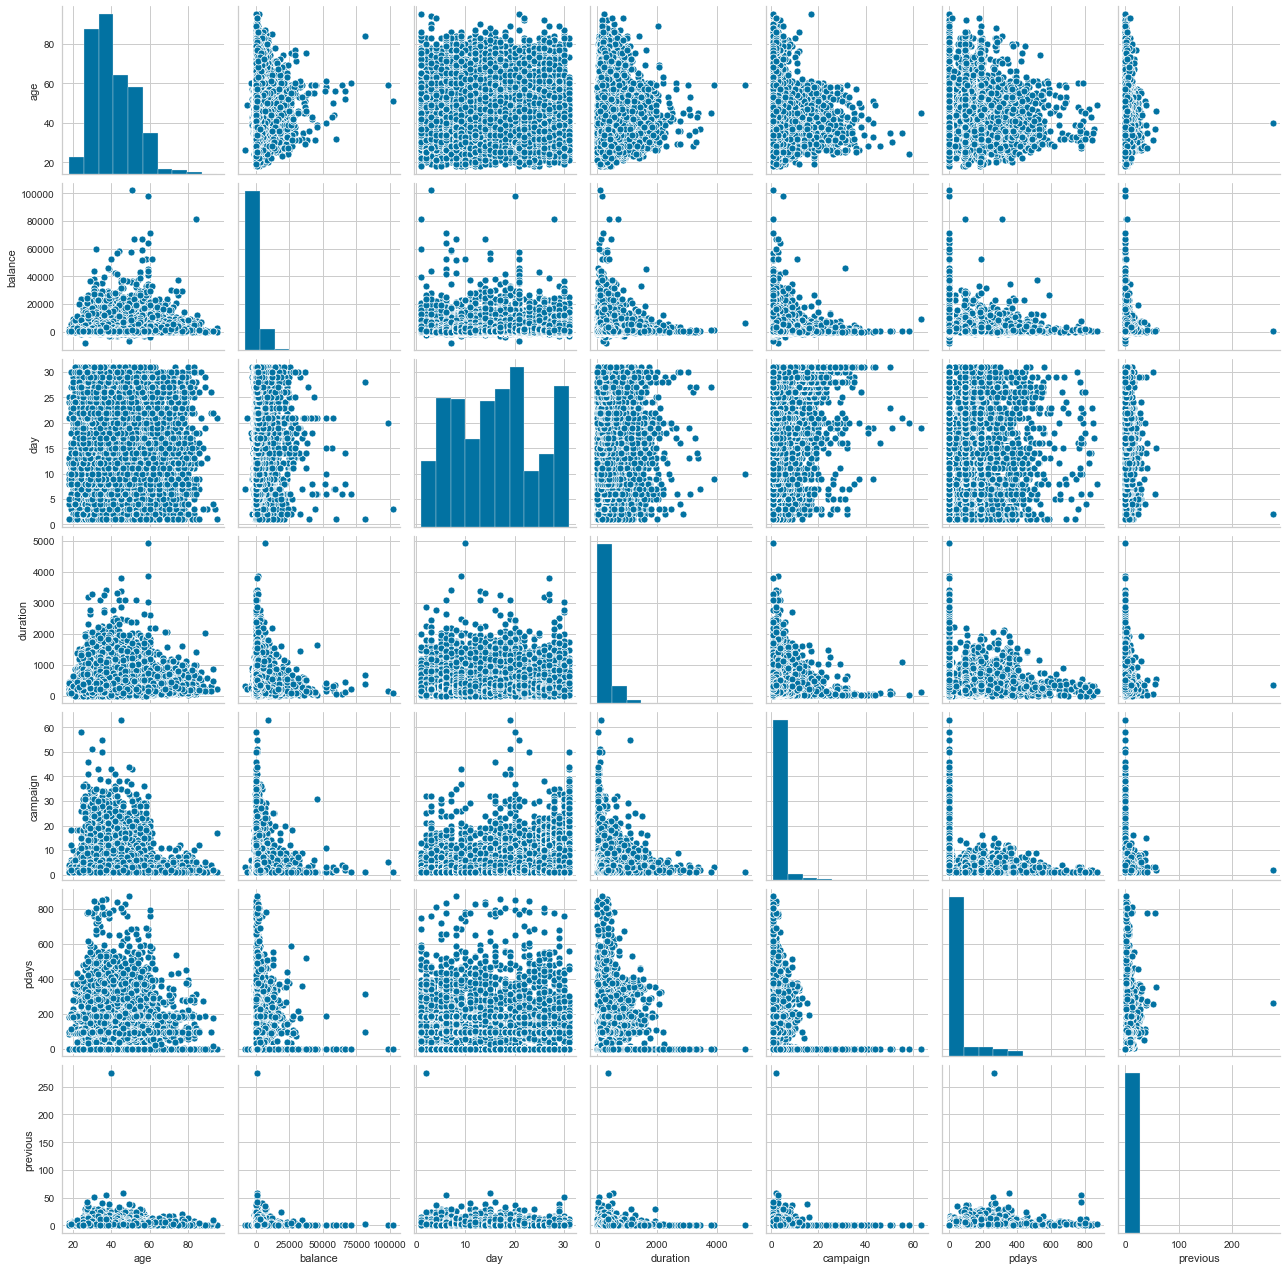

In [235]:
sns.pairplot(df)
plt.show()